# An "easy" and an "hard" instance for the `ialg` algorithm

While conducting our experimentes, we found two instances having a significant difference in the number of iterations required to execute the `ialg` algorithm . The first instance is the "easy" instance, which is an instance that require just one SEC, that we can compute immediatly. The second instance is the "hard" instance, which is an instance that requires a 19 SECs to be computed, hence, it takes quite some time (11s on our machine).

In [11]:
from scipy.ndimage import label

from ialg import ialg
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt 

While running our experiments, we found by chance the seeds leading to the easy and the hard instance. Here, we set them manually

In [12]:
# Set the number of nodes
n = 45
seed_easy = 100 * 7
seed_hard = 100 * 7 + 4

## Easy instance

In [13]:
np.random.seed(seed_easy) # To ensure reproducibility
# Sample n points in the unit square
X = np.random.uniform(0, 1, (n, 2))
# Compute the euclidean distance matrix
D = cdist(X, X, 'euclidean')

Plot the distribution of the points

<Figure size 1000x1000 with 0 Axes>

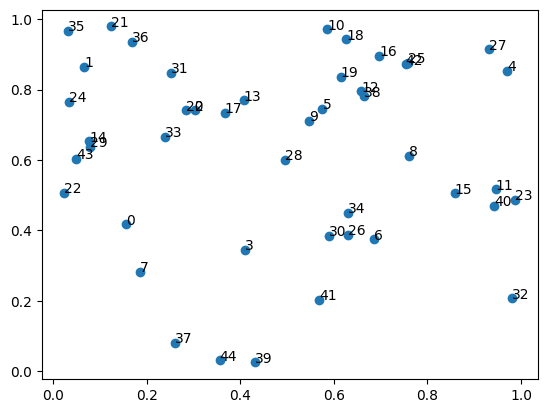

In [14]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
for i in range(n):
    ax.text(X[i, 0], X[i, 1], str(i))
plt.show()

In [15]:
# Create a graph and assign weight
G = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, cost=round(1000*D[i, j])) 

In [16]:
start = time.time()
S_family, S_num, partition, c_max, runtime, bb_nodes = ialg(G, verbose=True)
print("Time taken for easy instance: ", time.time() - start)

TSP compute in 0.0669715404510498 seconds. TSP cost = 5070
With smart initialization, we begin with #SECs = 0
They are:
Found smaller partition: 3 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 1 0 2
Found a solution with #SECs: 1
Specifically, they are:
[44, 37, 39]
Time taken for easy instance:  0.46134495735168457


## Hard instance

In [17]:
np.random.seed(seed_hard) # To ensure reproducibility
# Sample n points in the unit square
X = np.random.uniform(0, 1, (n, 2))
# Compute the euclidean distance matrix
D = cdist(X, X, 'euclidean')

Even in this case, we plot the distribution of the points to assess some differences

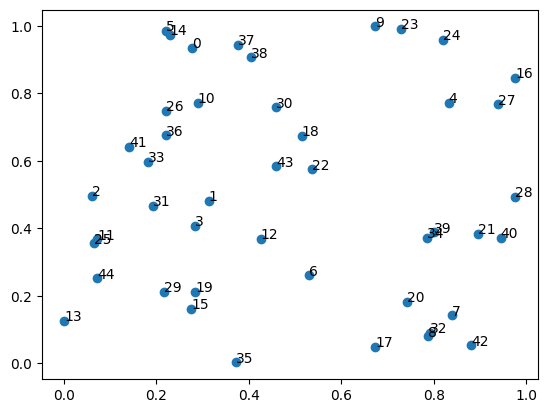

In [18]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
for i in range(n):
    ax.text(X[i, 0], X[i, 1], str(i))
plt.show()

In [19]:
# Create a graph and assign weight
G = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, cost=round(1000*D[i, j])) 

In [20]:
start = time.time()
S_family, S_num, partition, c_max, runtime, bb_nodes = ialg(G, verbose=True)
print("Time taken for hard instance: ", time.time() - start)

TSP compute in 0.16123199462890625 seconds. TSP cost = 5546
With smart initialization, we begin with #SECs = 4
They are:
[26, 33, 36, 41]
[33, 36, 41]
[0, 5, 14]
[33, 26, 36, 41, 10]
Found smaller partition: 6 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 1 4 2
Found smaller partition: 5 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 2 5 2
Found smaller partition: 5 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 3 6 2
Found smaller partition: 4 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 4 7 2
Found smaller partition: 3 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 5 8 2
Found smaller partition: 4 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 6 9 2
Found smaller partition: 4 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 7 10 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 8 11 2
Found smaller partition: 6 -> 2
num_bb_nodes, num_subtour_constrs, num_conn_comp = 9 12 2
Found smaller partition: 4 -> 3
num_bb_nodes,